In [1]:
from chebGreen.chebpy2 import Chebfun2, Chebpy2Preferences
import numpy as np
import matplotlib.pyplot as plt

In [122]:
eps = 1e-5
factor = 1e-2

In [123]:
def green(x,s):
    np.random.seed(42)
    g = 0
    g = (x <= s) * (x * (1-s)) + (x > s) * (s * (1-x))
    g = g + np.random.normal(loc = 0.0, scale = 0.25 * eps * factor, size=x.shape)
    return g

In [124]:
cheb2prefs = Chebpy2Preferences()
cheb2prefs.prefx.eps = eps
cheb2prefs.prefx.eps = eps

In [125]:
%%time
g = Chebfun2(green, domain = [0, 1, 0, 1], prefs = cheb2prefs)

CPU times: user 22.9 ms, sys: 2.9 ms, total: 25.8 ms
Wall time: 27.5 ms


In [126]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

In [127]:
%%time
G = g[x,y]

CPU times: user 172 ms, sys: 51.1 ms, total: 223 ms
Wall time: 57.8 ms


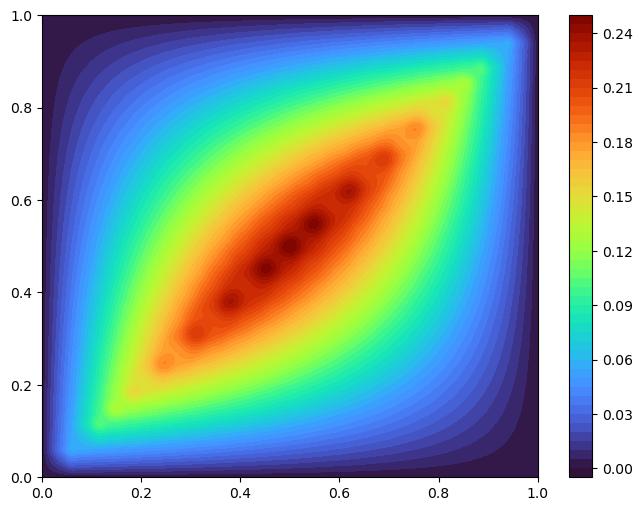

In [128]:
fig = plt.figure(figsize = (8,6))
plt.contourf(x, y, G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

0.25000000102297937


(0.0, 1.0)

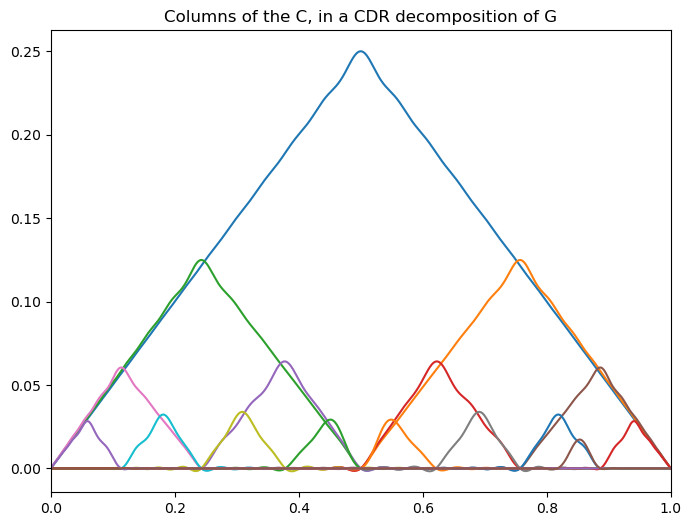

In [129]:
i = slice(0,-1)
fig = plt.figure(figsize = (8,6))
g.cols[:,i].plot()
print(np.max(g.cols[:,i].vscale))
plt.title(f'Columns of the C, in a CDR decomposition of G')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [130]:
i = 20
fig = plt.figure(figsize = (8,6))
g.cols[:,i].plot()
print(np.max(g.cols[:,i].vscale))
plt.title(f'{i}th column of the C, in a CDR decomposition of G')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

IndexError: index 20 is out of bounds for axis 0 with size 17

<Figure size 800x600 with 0 Axes>

In [131]:
%%time
u,s,v = g.svd()

CPU times: user 40.6 ms, sys: 2.83 ms, total: 43.5 ms
Wall time: 47.4 ms


In [132]:
u.shape

(inf, 17)

2.4279439512502274


(0.0, 1.0)

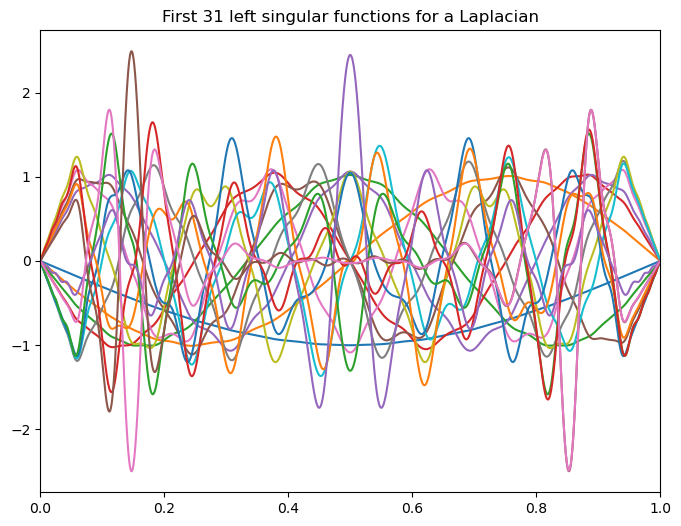

In [133]:
i = 30
fig = plt.figure(figsize = (8,6))
u[:,:i].plot()
print(np.max(u[:,:i].vscale))
plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [13]:
u[0,:i]

array([ 3.88578059e-16, -6.66133815e-16, -4.44089210e-16,  6.66133815e-16,
       -6.66133815e-16, -2.22044605e-16, -1.11022302e-15, -2.22044605e-16,
        0.00000000e+00,  0.00000000e+00, -4.44089210e-16,  8.88178420e-16,
       -4.44089210e-16,  0.00000000e+00,  4.44089210e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.33226763e-15,  0.00000000e+00])

In [9]:
Gtheory = green(x,y)
np.linalg.norm(G-Gtheory)/np.linalg.norm(Gtheory)

9.642534462399506e-05

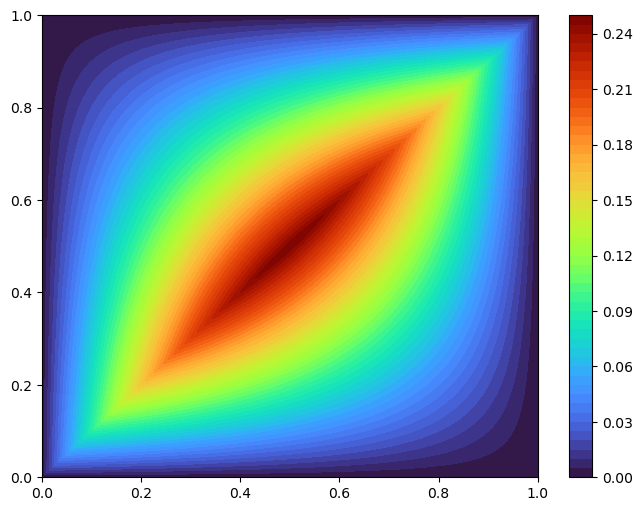

In [10]:
fig = plt.figure(figsize = (8,6))
plt.contourf(x, y, G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

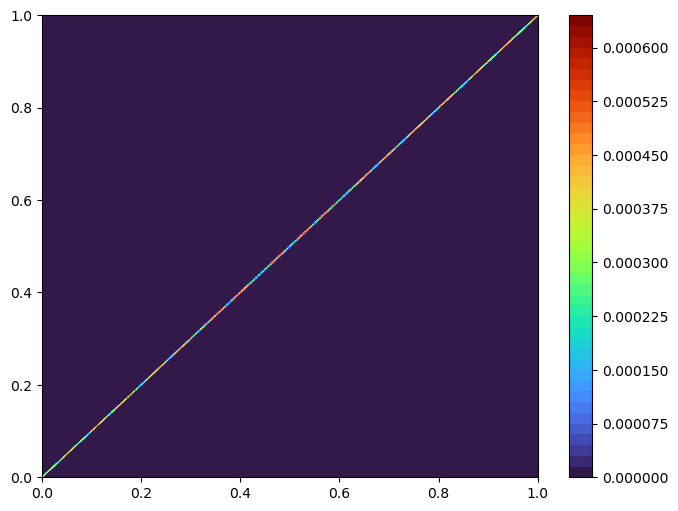

In [12]:
error = np.abs(G-Gtheory)
fig = plt.figure(figsize = (8,6))
plt.contourf(x, y, error, 50, cmap = 'turbo', vmin = np.min(error), vmax = np.max(error))
plt.colorbar()